In [ ]:
# TODO: try to run CellProfiler 
# TRY USING THIS https://github.com/CellProfiler/notebooks/blob/master/cellprofiler_demo.ipynb
#TODO: See if we can get cellprofiler to run from the command line and spit out these files into this folder directly

### Step 1: Load Data from CellProfiler ### 

In [1]:
# This code will find the csv files output by CellProfiler and merge them into a single dataframe called df_combined_data.
import HCMVcellclassification as HCMVcc
df_combined_data, df_image_url, exp_name = HCMVcc.ImportData_NUC_CYTO()

EXPERIMENT NAME: 149_20191022_H3K4me3_v1

IMPORTED AND MERGED THE FOLLOWING FILES:
 - 149_20191022_H3K4me3_v1_NUC_DAPI.csv
 - 149_20191022_H3K4me3_v1_Cytoplasm.csv
 - 149_20191022_H3K4me3_v1_Image.csv

DETECTED NUCLEI: 34,363


### Step 3: Data Organization and Check ####

In [2]:
# Display what the Image channels are named from cellprofiler, we want to make sure that C2 is the nucleus marker 
# TODO: Show the user the metadata column options #df_combined_data.columns.values also choose which chanels are which to use i.e. C1 C2 C3
var_C1 = df_image_url.columns.values[2] # will be displayed as red
var_C2 = df_image_url.columns.values[0] # will be displayed as green
var_C3 = df_image_url.columns.values[1] # will be dispalyed as blue
print(f'Channel 1 (Red) = {var_C1} \nChannel 2 (Green) = {var_C2} \nChannel 3 (Blue) = {var_C3}')

Channel 1 (Red) = URL_gB 
Channel 2 (Green) = URL_DAPI 
Channel 3 (Blue) = URL_H3K4me3


In [ ]:
# I named my metadata incorrectly,so i need to swap some column names
df_combined_data = HCMVcc.columnSWAP(df_combined_data,'Metadata_timepoint_NUC','Metadata_biorep_NUC')

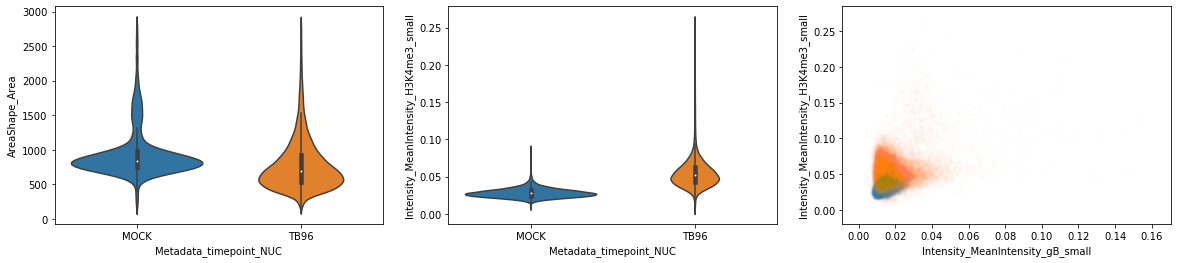

In [8]:
group_data_by = 'Metadata_timepoint_NUC'
display_x_axis = 'Intensity_MeanIntensity_gB_small'
display_y_axis = 'Intensity_MeanIntensity_H3K4me3_small'
HCMVcc.DataCheck(df_combined_data, group_data_by, display_x_axis, display_y_axis)
#TODO: RENDER A FEW CELLS HERE ALSO, RANDOMLY SO WE GET AN IDEA OF DATA QUALITY BEFORE EXPORT

---

### Step 4 ### Export images of each nucleus into a folder for use by the CNN

In [7]:
# i needed to write this to convert from windows filepaths to linux...
df_combined_data = HCMVcc.URLFIX(df_combined_data,"file:///G:/149_other%20histone%20modifications","/media/djproc/Data_3/149_other histone modifications",['URL_DAPI','URL_gB','URL_H3K4me3'])

In [9]:
HCMVcc.GenerateIDs_IMGexport(df_combined_data,group_data_by,var_C1,var_C2,var_C3, exp_name, 600)

  2%|▏         | 836/34363 [00:00<00:04, 8350.61it/s]

EXAMPLE IDS: 149_20191022_repA_MOCK_1_2


100%|██████████| 34363/34363 [00:09<00:00, 3737.79it/s]


### Step 6: Train and Predict (or just predict) ###

In [ ]:
# GO TO EITHER OF THE CNN_TRAIN AND PREDICT OR CNN_PREDICTIONS ONLY FROM GENERALIZABLE CNN

In [ ]:
# Then once satisfied with the training 

### Step 7: Perform quantification of CNN predictions ###